In [5]:
import numpy as np
from matplotlib import pyplot as plt

# Brownian Motion

$$\begin{align}
B_0 &= 0 \\
B_{n\Delta t} &= B_{(t-1)\Delta t} + \sqrt{\Delta t} z_n
\end{align}$$

where $z_n \sim \mathcal{N}(0,1)$.

In [28]:
# Alternatively we can drop the T variable and merely stipulate an increment + number of points to compute
def BM_path(T, time_points):
    increment = T/time_points
    trajectory = [0]
    for i in range(time_points):
        realization = trajectory[-1]+np.sqrt(increment)*np.random.normal()
        trajectory.append(realization)
    return trajectory

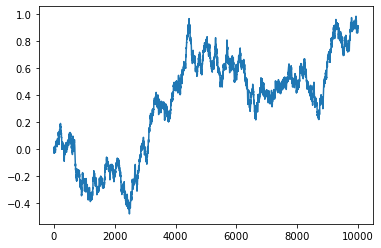

In [108]:
# to-do: x-axis should be scaled to end with value T
plt.plot(BM_path(1,10000))

# Poisson process (MIGHT NOT BE CORRECT. CHECK LATER)

The random numbers with exponential distribution can be computed using `numpy.random.exponential`:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

The exponential function above uses a different parameter $\beta = 1/\lambda$.

In [83]:
def poisson_path(intensity,T,time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]+np.random.exponential(beta)
        s_trajectory.append(realization)
    
    #poisson trajectory
    poisson_trajectory = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points) if s_trajectory[k] <= i*increment])
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

[0, 2, 5, 7, 7, 7, 7, 10, 11, 11, 12, 13, 13, 16, 17, 19, 21, 22, 22, 22, 24, 24, 27, 28, 28, 28, 28, 28, 28, 28]


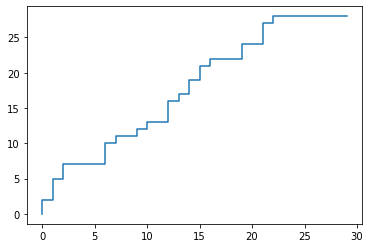

In [84]:
p = poisson_path(1, 30, 30)
plt.step([i for i in range(0,30)],p)
print(p)

Same as above but with the method described by the professor in the slides.

In [95]:
def poisson_path_2(intensity, T, time_points):
    #parameters & discretization
    time_points -= 1
    increment = T/time_points
    beta = 1/intensity
    
    #generating trajectory for s process
    s_trajectory = [0]
    for i in range(time_points):
        realization = s_trajectory[-1]-np.log(np.random.uniform())/intensity
        s_trajectory.append(realization)
    
    #poisson trajectory
    poisson_trajectory = [0]
    for i in range(1,time_points+1):
        realization = max([k for k in range(0,time_points+1) if s_trajectory[k] <= i*increment])
        poisson_trajectory.append(realization)
    
    return poisson_trajectory

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


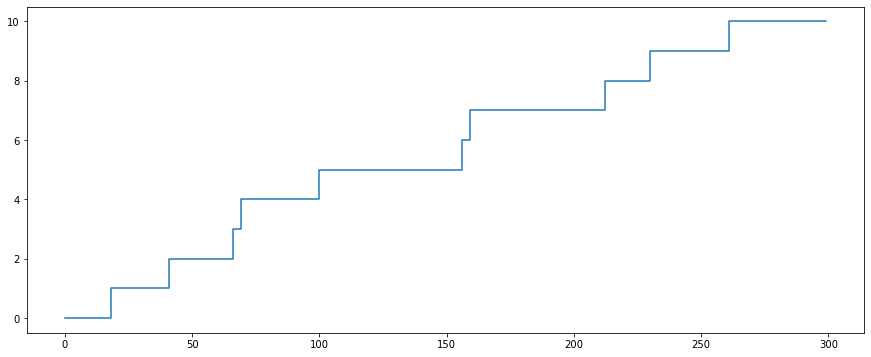

In [106]:
p = poisson_path_2(0.5, 30, 300)
plt.figure(figsize = (15,6))
plt.step([i for i in range(0,300)],p)
print(p)

# Discretizing the Lévy measure

$$ \nu(dx) = d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx$$

In [175]:
def meixner_meas(x, a = 0.0890,b = -1.1323,d = 5.0262):
    return d*(np.exp(b*x/a)/(x*np.sinh(np.pi*x/a)))

In [178]:
meixner_meas(-0.5)

0.0002517176883670683

(-0.01, 0.01)

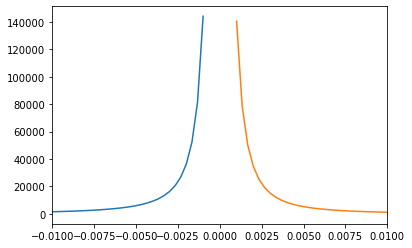

In [181]:
# code to plot meixner density function
x1 = np.linspace(-1,-0.001,3000)
x2 = np.linspace(0.001,1,3000)
plt.plot(x1,meixner_meas(x1))
plt.plot(x2,meixner_meas(x2))
plt.xlim(-0.01,0.01)

In [186]:
# creates a partition using Inverse Linear Boundaries method described in Schouten's book
def x_partition(k, alpha):
    return np.array([-alpha*i**(-1) for i in range(1,k+1)])

a_array = x_partition(50,0.2)


lambdas = [integrate.quad(lambda x: meixner_meas(x), a_array[i],a_array[i+1] )[0] for i in range(len(a_array)-1)]

In [ ]:
plt.plot(a_array[0:-1],lambdas,".")

# We're dropping the following method for now
$$ F_x(y) = \int_\alpha^y d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx - C$$
where $\alpha$ is the root found in the previous iteration and $$C = \int_{-1}^{-0.9} d \frac{\exp(bx/a)}{x \sinh(\pi x /a)} \, dx$$
then apply the bissection root-finding algorithm.